## Plot tumor purity prediction results

Here, we'll visualize the results of our tumor purity prediction. For now, we're trying to predict whether a given sample is above or below the median tumor purity (i.e. classification).

Results analyzed here are generated by the `run_purity_prediction.py` script.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mpmp.config as cfg
import mpmp.utilities.analysis_utilities as au

In [2]:
# set results directory
results_dir = Path(cfg.results_dir,
                   'purity_binarized_preds',
                   'purity').resolve()

In [3]:
results_df = (
    au.load_purity_binarized_results(results_dir)
      .drop(columns=['identifier'])
)
# all me_450k results are compressed
results_df[results_df.training_data == 'me_450k'] = 'me_450k_compressed'
print(results_df.shape)
print(results_df.training_data.unique())
results_df.head()

(240, 7)
['expression_compressed' 'me_450k_compressed' 'me_27k' 'me_27k_compressed'
 'expression']


,auroc,aupr,training_data,signal,seed,data_type,fold
0,0.85828,0.84458,expression_compressed,signal,1,train,0
1,0.8577,0.85201,expression_compressed,signal,1,test,0
2,0.82563,0.80659,expression_compressed,signal,1,cv,0
3,0.86134,0.8522,expression_compressed,signal,1,train,1
4,0.84888,0.82701,expression_compressed,signal,1,test,1


Text(0, 0.5, 'AUPR')

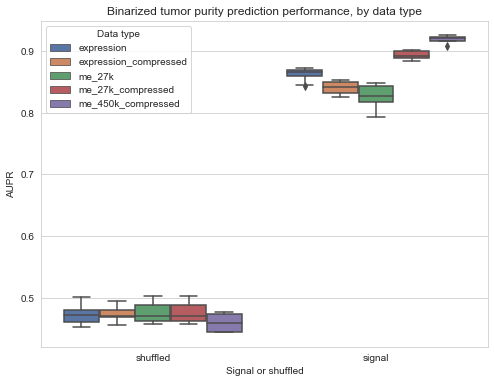

In [4]:
sns.set({'figure.figsize': (8, 6)})
sns.set_style('whitegrid')
plot_df = (
    results_df[results_df.data_type == 'test']
      .sort_values(by=['signal', 'training_data'])
)

sns.boxplot(data=plot_df, x='signal', y='aupr', hue='training_data')
plt.title('Binarized tumor purity prediction performance, by data type')
plt.legend(title='Data type')
plt.xlabel('Signal or shuffled')
plt.ylabel('AUPR')

In [5]:
# now facet by cancer type
import mpmp.utilities.data_utilities as du
sample_info_df = du.load_sample_info('expression')
results_df = au.load_purity_by_cancer_type(results_dir, sample_info_df)
# all me_450k results are compressed
results_df[results_df.training_data == 'me_450k'] = 'me_450k_compressed'
print(results_df.shape)
results_df.head()

(2640, 6)


,training_data,signal,seed,fold_no,cancer_type,aupr
0,expression_compressed,signal,1,0,LUAD,0.519477
1,expression_compressed,signal,1,0,GBM,0.969798
2,expression_compressed,signal,1,0,LUSC,0.823606
3,expression_compressed,signal,1,0,OV,NaN
4,expression_compressed,signal,1,0,PRAD,0.709815


Text(0, 0.5, 'AUPR')

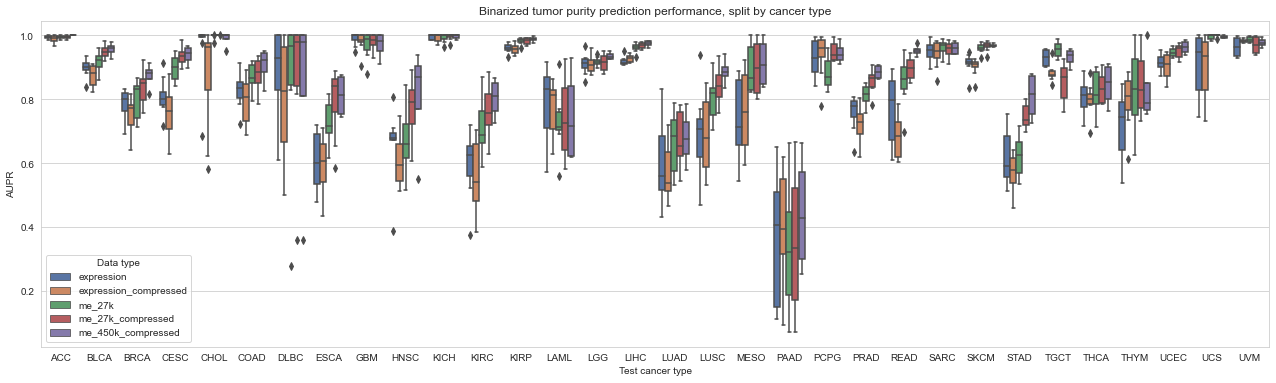

In [6]:
sns.set({'figure.figsize': (22, 6)})
sns.set_style('whitegrid')
plot_df = (
    results_df[(results_df.signal == 'signal') &
               ~(results_df.cancer_type.isin(['OV']))]
      .sort_values(by=['training_data', 'cancer_type'])
)

sns.boxplot(data=plot_df, x='cancer_type', y='aupr', hue='training_data')
plt.title('Binarized tumor purity prediction performance, split by cancer type')
plt.legend(title='Data type')
plt.xlabel('Test cancer type')
plt.ylabel('AUPR')

In [7]:
top_cancer_types = (sample_info_df
    .groupby('cancer_type')
    .count()
    .drop(columns=['id_for_stratification'])
    .rename(columns={'sample_type': 'count'})
    .sort_values(by='count', ascending=False)
)
top_cancer_types.head()

,count
cancer_type,
BRCA,1218
KIRC,606
LUAD,576
THCA,572
UCEC,567


Text(0, 0.5, 'AUPR')

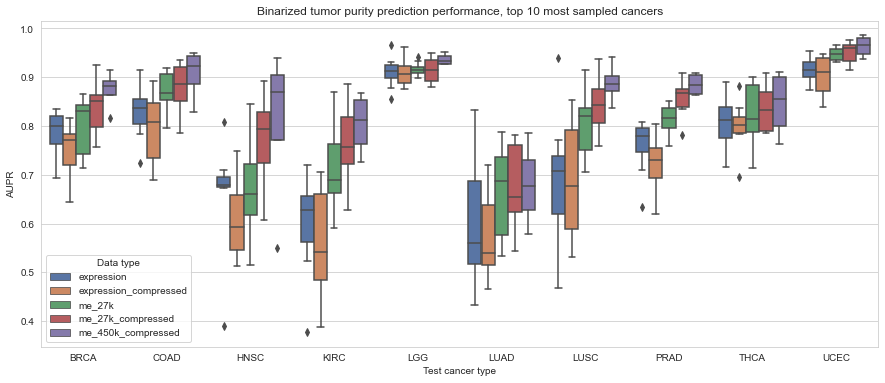

In [8]:
sns.set({'figure.figsize': (15, 6)})
sns.set_style('whitegrid')
plot_df = (
    results_df[(results_df.signal == 'signal') &
               (results_df.cancer_type.isin(top_cancer_types.index[:10]))]
      .sort_values(by=['training_data', 'cancer_type'])
)

sns.boxplot(data=plot_df, x='cancer_type', y='aupr', hue='training_data')
plt.title('Binarized tumor purity prediction performance, top 10 most sampled cancers')
plt.legend(title='Data type')
plt.xlabel('Test cancer type')
plt.ylabel('AUPR')